In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model

from sqlalchemy import create_engine
import statsmodels.api as sm

%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

import warnings

warnings.filterwarnings(action="ignore")

import config

<IPython.core.display.Javascript object>

In [3]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "houseprices"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from houseprices", con=engine)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
df.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


<IPython.core.display.Javascript object>

In [5]:
df = pd.concat(
    [df, pd.get_dummies(df.condition1, prefix="condition1", drop_first=True)], axis=1
)
df = pd.concat(
    [df, pd.get_dummies(df.condition2, prefix="condition2", drop_first=True)], axis=1
)
dummy_cols = list(
    pd.get_dummies(df.condition1, prefix="condition1", drop_first=True).columns
)
dummy_cols = dummy_cols + list(
    pd.get_dummies(df.condition2, prefix="condition2", drop_first=True).columns
)

<IPython.core.display.Javascript object>

In [10]:
X = df[
    ["overallqual", "grlivarea", "garagecars", "garagearea", "totalbsmtsf"] + dummy_cols
]
y = df.saleprice

<IPython.core.display.Javascript object>

In [11]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:13:06   Log-Likelihood:                -17465.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1439   BIC:                         3.508e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.093e+05   2.72e+04     -4.015      0.000   -1.63e+05   -5.59e+04
overallqual       2.293e+04   1075.527     21.322      0.000    2.08e+04     2.5e+04
grlivarea           48.2718      2.499     19.320      0.000      43.371      53.173
garagecars        1.239e+04   3006.773      4.120      0.000    6489.918    1.83e+04
garagearea          23.6586     10.385      2.278      0.023       3.288      44.029
totalbsmtsf         31.6301      2.881     10.980      0.000      25.979      37.281
condition1_Feedr  1.064e+04   7192.319      1.480      0.139   -3465.783    2.48e+04
condition1_Norm   2.518e+04   5843.632      4.309      0.000    1.37e+04    3.66e+04
condition1_PosA   1.861e+04   1.47e+04      1.265      0.206   -1.02e+04    4.75e+04
condition1_PosN   1.916e+04   1.09e+04      1.754      0.080   -2266.670    4.06e+04
condition1_RRAe   4081.2714   1.29e+04      0.317      0.751   -2.12e+04    2.94e+04
condition1_RRAn   2.037e+04   9806.080      2.078      0.038    1138.066    3.96e+04
condition1_RRNe   1.475e+04   2.76e+04      0.534      0.594   -3.94e+04    6.89e+04
condition1_RRNn   2.495e+04   1.84e+04      1.356      0.175   -1.12e+04     6.1e+04
condition2_Feedr   -3.6e+04   3.24e+04     -1.111      0.267   -9.96e+04    2.76e+04
condition2_Norm  -1.216e+04   2.77e+04     -0.439      0.661   -6.65e+04    4.22e+04
condition2_PosA  -1.366e+04   4.73e+04     -0.289      0.773   -1.06e+05    7.92e+04
condition2_PosN   -1.62e+05   4.01e+04     -4.041      0.000   -2.41e+05   -8.33e+04
condition2_RRAe  -3.445e+04   4.74e+04     -0.726      0.468   -1.27e+05    5.86e+04
condition2_RRAn  -5.056e+04   4.74e+04     -1.068      0.286   -1.43e+05    4.23e+04
condition2_RRNn   8585.1105    3.9e+04      0.220      0.826   -6.79e+04    8.51e+04
==============================================================================
Omnibus:                      411.281   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39247.829
Skew:                          -0.100   Prob(JB):                         0.00
Kurtosis:                      28.399   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [14]:
predictions = model.predict()
errors = y - predictions
print("Mean of the errors in the model is : {}".format(np.mean(errors)))

Mean of the errors in the model is : -1.2107073865218522e-08


<IPython.core.display.Javascript object>

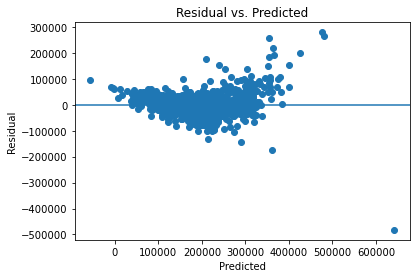

<IPython.core.display.Javascript object>

In [15]:
plt.scatter(predictions, errors)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [16]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print(
    "Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(
        bart_stats[0], bart_stats[1]
    )
)
print(
    "Levene test statistic value is {0:3g} and p value is {1:.3g}".format(
        lev_stats[0], lev_stats[1]
    )
)

Bartlett test statistic value is 511.323 and p value is 3.27e-113
Levene test statistic value is 494.466 and p value is 2.52e-101


<IPython.core.display.Javascript object>

Another set of p-values < 0.05. Proof of heteroscedastic errors

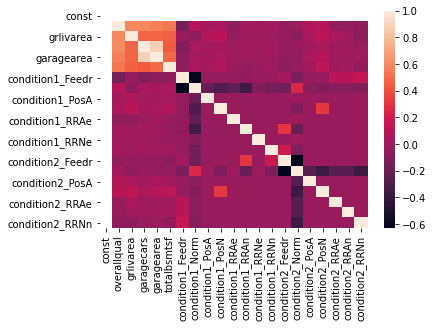

<IPython.core.display.Javascript object>

In [19]:
sns.heatmap(X.corr())
plt.show()

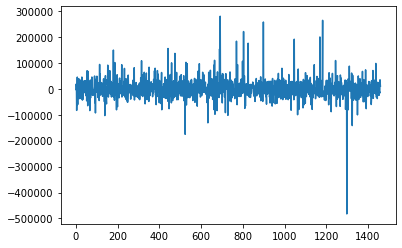

<IPython.core.display.Javascript object>

In [20]:
plt.plot(errors)
plt.show()

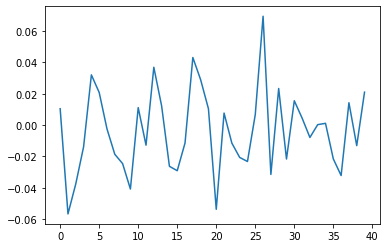

<IPython.core.display.Javascript object>

In [21]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

This error data is not autocorellated.

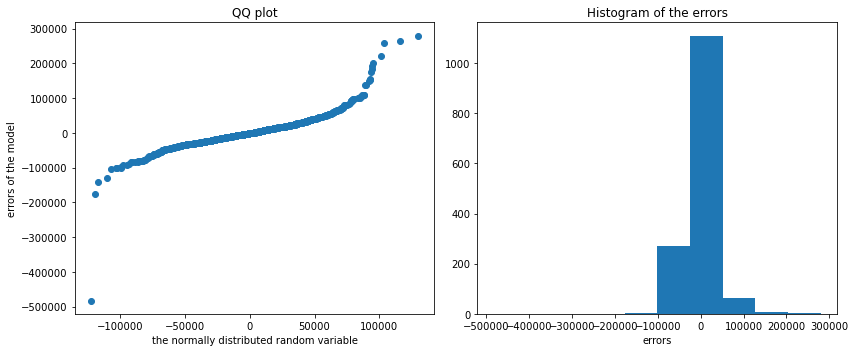

<IPython.core.display.Javascript object>

In [22]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(np.sort(rand_nums), np.sort(errors))  # Sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1, 2, 2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

<IPython.core.display.Javascript object>

In [25]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 39247.829260178325 and p value is 0.0
Normality test statistics is 411.28107313076634 and p value is 4.914164769093635e-90


<IPython.core.display.Javascript object>

As suspected. The errors are not normally distributed. As shown by both these p-values coming in at < 0.05.